# Build basic classification algorithms - consolidating the foundations of ML

### Importing library for load datasets

In [5]:
from sklearn import datasets

### Importing dataset iris of sklearn datasets

In [6]:
iris_dataset = datasets.load_iris()

### Extract features an labels

In [7]:
X = iris_dataset.data[:100, [0,2]]
Y = iris_dataset.target[:100]

### Plot sepal and petal lenght  characteristics

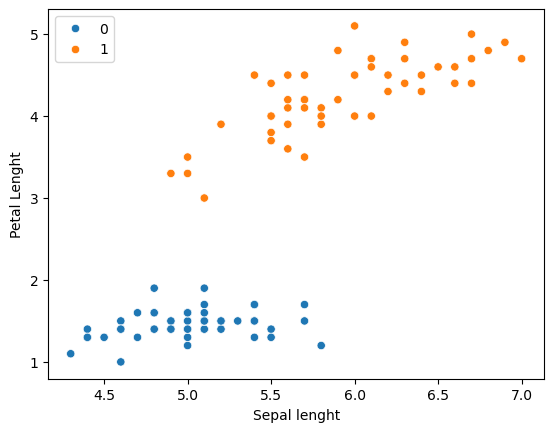

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# plot data
sns.scatterplot(x=X[:100, 0], y= X[:100, 1], hue=Y[:100])
plt.xlabel('Sepal lenght')
plt.ylabel('Petal Lenght')
plt.legend(loc='upper left')

plt.show()

### Implementing the Perceptron

In [9]:
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight
        initialization.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, seed=1, n_iter=100):
        self.eta = eta
        self.seed = seed
        self.n_iter = n_iter

    def fit(self, X, Y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples and
            n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.

        Returns
        -------
        self : object

        """

        rng = np.random.default_rng(self.seed)
        self.w_ = rng.normal(loc=0.0, scale=.01, size=X.shape[1])
        self.b_ = np.float_(0.00)
        self.errors_ = []

        for i in range(self.n_iter):
            errors = 0
            for x, y in zip(X, Y):
                y_predict = self.predict(x)
                update = self.eta * (y - y_predict)
                self.w_ += update * x
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_ .append(errors)
        return self

    def net_input(self, x):
        return np.dot(x, self.w_) + self.b_

    def predict(self, x):
        return np.where(self.net_input(x) >= 0, 1, 0)

### Creating a Perceptron instance called pnn and training it with the characteristics and tags

In [10]:
pnn = Perceptron()
pnn.fit(X,Y)

### Plotting the characteristics and the obtained linear classificator

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 6.1)

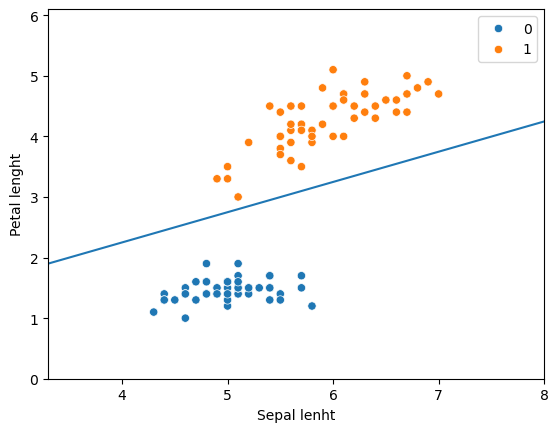

In [11]:

plt.xlabel('Sepal lenht')
plt.ylabel('Petal lenght')
plt.legend(loc='upper right')

# Create a sequence array x for graph y(x)
x = np.linspace(0, 8, 400)
# Define the linear clasificator y(x) = -b/w[1] - x*w[0]/w[1]
y = (-pnn.b_ - x*pnn.w_[0]) / pnn.w_[1]
# Plot all the features
sns.scatterplot(x=X[:100, 0], y= X[:100, 1], hue=Y[:100])
# Plot the linear clasificator
plt.plot(x,y)
# Set the limits of the graph
plt.xlim(min(X[:100, 0]) - 1, max(X[:100, 0]) + 1) 
plt.ylim(min(X[:100, 1]) - 1, max(X[:100, 1]) + 1)

